# Desafio - EXPANSÃO DE UMA REDE DE LABORATÓRIOS

# 1. Introdução

## 1.1. Cenário

A medicina diagnóstica tem um papel
fundamental na jornada de atendimento dos
pacientes de qualquer sistema de saúde em
qualquer lugar do mundo, sendo somente
nos EUA um mercado de aproximadamente
106 bilhões de dólarers com mais de 40 mil
laboratórios, empregando mais de 680 mil
funcionários segundo a ACLA.

## 1.2. Problema

Diante desse cenário, o desafio proposto tem
como objetivo auxiliar a área de negócios
de uma rede norte americana de medicina
diagnóstica a ter insumos iniciais para suportar
seu plano de expansão da rede de laboratórios.

Sabe-se que não é possível ou é bem difícil
gerar demanda e fazer ofertas neste tipo de
mercado, entretanto é muito interessante e
rentável fidelizar o cliente para que ele sempre
visite a rede quando surgir a necessidade.

## 1.3. Objetivo

Apresentar e justificar a escolha de TRÊS ZIP CODES para a
instalação dos novos laboratórios da rede.

## 1.4. Definição caminhos de abordagem

Para definir os caminhos de abordagem para o problema em questão,
é necessário o entendimento do problema e objetivo do desafio.
Será fundamental a definição de métricas para avaliar cada
laboratório levando em consideração diversos fatores que
justificarão a decisão final de escolha dos três laboratórios da rede.
Os tipos de fatores que serão considerados serão:

* Histórico
* Econômico
* Logístico
* Demográfico
* Geográfico

# 2. Coleta dos dados

Importante: Os dados não estão no repositório do Github, porque excede o limite de dados armazenados permitido.

In [184]:
# Importando as bibliotecas
import pandas as pd

In [185]:
df_geo = pd.read_csv("data/df_geocode.csv", index_col=0)
df_geo.head()

,Lab Id,Address,Location,Zipcode
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096.0
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440.0
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034.0
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342.0
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469.0


In [186]:
df_exames = pd.read_csv("data/transactional_data.csv", delimiter=";")
df_exames.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,"9,0"
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,"13,0"
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,"49,0"
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,"11,0"
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,"10,0"


In [187]:
df_exames.dtypes

Patient Id         object
Gender             object
Date of birth      object
Date of service    object
Service Id         object
Lab Id             object
CodItem             int64
Testing Cost       object
dtype: object

In [188]:
df_info_exames = pd.read_csv("data/test_data.csv")
df_info_exames.head()

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,CORELAB,BIOCHEMISTRY,0.80
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.02


In [189]:
df_info_exames.dtypes

CodItem           int64
Desc Item        object
Category         object
Family           object
Speciality       object
Testing Cost    float64
dtype: object

In [190]:
df_demographic = pd.read_csv("data/DemographicData_ZCTAs.csv", index_col=0)
df_demographic.head()

,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,8600000US35004,ZCTA5 35004,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,8600000US35005,ZCTA5 35005,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,8600000US35006,ZCTA5 35006,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2
3,8600000US35007,ZCTA5 35007,26332,95.0,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.7
4,8600000US35010,ZCTA5 35010,20613,90.5,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.6


In [191]:
df_demographic.dtypes

Id                                  object
GeographicAreaName                  object
TotalPopulation                      int64
SexRatio(males per 100 females)    float64
Population_Under5Years               int64
Population_5to9Years                 int64
Population_10to14Years               int64
Population_15to19Years               int64
Population_20to24Years               int64
Population_25to34Years               int64
Population_35to44Years               int64
Population_45to54Years               int64
Population_55to59Years               int64
Population_60to64Years               int64
Population_65to74Years               int64
Population_75to84Years               int64
Population_85YearsAndOver            int64
MedianAgeInYears                   float64
dtype: object

In [192]:
df_economic = pd.read_csv("data/EconomicData_ZCTAs.csv", index_col=0)
df_economic.head()

,id,Geographic Area Name,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,8600000US35004,ZCTA5 35004,198,71,298,513,647,1117,529,945,245,61
1,8600000US35005,ZCTA5 35005,188,184,318,293,353,562,299,407,67,26
2,8600000US35006,ZCTA5 35006,71,20,117,104,154,176,124,194,51,7
3,8600000US35007,ZCTA5 35007,396,208,670,462,1173,1854,1578,2224,473,254
4,8600000US35010,ZCTA5 35010,700,610,1093,957,1056,1512,807,749,254,249


In [193]:
df_economic.dtypes

id                                    object
Geographic Area Name                  object
TotalHouseholds_LessThan$10.000        int64
TotalHouseholds_$10.000to$14.999       int64
TotalHouseholds_$15.000to$24.999       int64
TotalHouseholds_$25.000to$34.999       int64
TotalHouseholds_$35.000to$49.999       int64
TotalHouseholds_$50.000to$74.999       int64
TotalHouseholds_$75.000to$99.999       int64
TotalHouseholds_$100.000to$149.999     int64
TotalHouseholds_$150.000to$199.999     int64
TotalHouseholds_$200.000OrMore         int64
dtype: object

# 2. Tratamento dos dados

In [194]:
df_geo.head()

,Lab Id,Address,Location,Zipcode
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096.0
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440.0
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034.0
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342.0
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469.0


In [195]:
df_geo.dtypes

Lab Id       object
Address      object
Location     object
Zipcode     float64
dtype: object

In [196]:
df_geo.isnull().sum()

Lab Id      0
Address     0
Location    0
Zipcode     1
dtype: int64

In [197]:
df_geo = df_geo.dropna(axis=0)

In [198]:
df_labs = df_geo[["Zipcode", "Lab Id", "Address"]]
df_labs.head()

,Zipcode,Lab Id,Address
0,30096.0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096"
1,13440.0,L520,"1614 N JAMES ST, ROME, NY 13440"
2,98034.0,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034"
3,30342.0,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342"
4,61469.0,L545,"1204 IL HWY 164, OQUAWKA, IL 61469"


In [199]:
# Separar a coluna Location em duas Colunas de Latitude e Longitude
lat = []
lon = []
for location in df_geo["Location"]:
    lat_lon = location.split(",")
    lat.append(float(lat_lon[0]))
    lon.append(float(lat_lon[1]))
df_labs["Lat"] = lat
df_labs["Lon"] = lon
df_labs.head()

,Zipcode,Lab Id,Address,Lat,Lon
0,30096.0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096",34.000319,-84.162972
1,13440.0,L520,"1614 N JAMES ST, ROME, NY 13440",43.231133,-75.444536
2,98034.0,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034",47.716279,-122.183815
3,30342.0,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342",33.909388,-84.352910
4,61469.0,L545,"1204 IL HWY 164, OQUAWKA, IL 61469",40.930993,-90.943760


In [200]:
# unindo os dataframes pela coluna cod_item
df_exames = pd.merge(df_exames, df_info_exames, on='CodItem')
df_exames.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost_x,Desc Item,Category,Family,Speciality,Testing Cost_y
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,"9,0","MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,10225666807-BIO002,F,16/07/1968 00:00:00,2019-01-15,573103867832-51,L139,70003237,"9,0","MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
2,571700011536-BIO002,F,17/04/1961 00:00:00,2019-01-04,571706608210-36,L131,70003237,"9,0","MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
3,574400001820-BIO002,F,01/04/1966 00:00:00,2019-01-17,574400919309-64,L150,70003237,"9,0","MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
4,10210855836-BIO003,F,25/12/1980 00:00:00,2019-02-08,575007148185-72,L155,70003237,"9,0","MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78


In [201]:
df_exames["Gender"].unique()

array(['F', 'M', 'I'], dtype=object)

In [202]:
# Transformar a coluna Testing Cost de string para float
testing_costs = []
for cost in df_exames["Testing Cost_x"]:
    testing_costs.append(float(cost.replace(',', '.')))
df_exames["Testing Cost_x"] = testing_costs

# Calcular o número de clientes para cada laboratório
qtd_clientes = df_exames.groupby('Lab Id')['Patient Id'].nunique()

# Calcular o valor total para cada laboratório
df_exames_total = df_exames.groupby('Lab Id')['Testing Cost_x'].sum()

# Calcular o número de exames para cada laboratório
df_exames_count = df_exames.groupby('Lab Id')['Testing Cost_x'].count()

# Calcular o ticket médio para cada laboratório
df_exames_mean = df_exames.groupby('Lab Id')['Testing Cost_x'].mean()

# Calcular o número de exames para mulheres
df_exames_mulheres = df_exames[df_exames["Gender"] == "F"].groupby('Lab Id')['Gender'].count()

# Calcular o número de exames para homens
df_exames_homens = df_exames[df_exames["Gender"] == "M"].groupby('Lab Id')['Gender'].count()

# Calcular o valor total gasto para cada laboratório
df_exames_total_cost = df_exames.groupby('Lab Id')['Testing Cost_y'].sum()

# Calcular o custo médio para cada laboratório
df_exames_mean_cost = df_exames.groupby('Lab Id')['Testing Cost_y'].mean()

# agrupando por laboratório e contando valores únicos de exames
qtd_exames_por_lab = df_exames.groupby('Lab Id')['CodItem'].nunique()

# agrupando por laboratório e contando valores únicos de categorias
qtd_categorias_por_lab = df_exames.groupby('Lab Id')['Category'].nunique()

# agrupando por laboratório e contando valores únicos de famílias
qtd_familias_por_lab = df_exames.groupby('Lab Id')['Family'].nunique()

# agrupando por laboratório e contando valores únicos de especialidades
qtd_especialidades_por_lab = df_exames.groupby('Lab Id')['Speciality'].nunique()

# Juntar os resultados em um único dataframe
df_resultado = pd.concat([qtd_clientes, df_exames_total, df_exames_count, df_exames_mean, df_exames_mulheres, df_exames_homens, df_exames_total_cost, df_exames_mean_cost, qtd_exames_por_lab, qtd_categorias_por_lab, qtd_familias_por_lab, qtd_especialidades_por_lab], axis=1)
df_resultado.columns = ['Qtd de Clientes', 'Faturamento', 'Qtd de Exames', 'Ticket Médio', "Qtd de Exames para Mulheres", "Qtd de Exames para Homens", "Custo Total", "Custo Médio", "Qtd de Exames Diferentes", "Qtd de Categorias Diferentes", "Qtd de Famílias Diferentes", "Qtd de Especialidades Diferentes"]

# Juntar com o dataframe dos laboratórios
df_labs = df_labs.merge(df_resultado, left_on='Lab Id', right_index=True)
df_labs[["Zipcode", "Lab Id", "Qtd de Clientes", "Faturamento", "Qtd de Exames", "Ticket Médio", "Qtd de Exames para Mulheres", "Qtd de Exames para Homens", "Custo Total", "Custo Médio", "Qtd de Exames Diferentes", "Qtd de Categorias Diferentes", "Qtd de Famílias Diferentes", "Qtd de Especialidades Diferentes"]].head()

,Zipcode,Lab Id,Qtd de Clientes,Faturamento,Qtd de Exames,Ticket Médio,Qtd de Exames para Mulheres,Qtd de Exames para Homens,Custo Total,Custo Médio,Qtd de Exames Diferentes,Qtd de Categorias Diferentes,Qtd de Famílias Diferentes,Qtd de Especialidades Diferentes
0,30096.0,L152,22016,6255437.62,95828,65.277765,62247,33581,2512512.65,26.218982,938,6,21,67
1,13440.0,L520,3815,582095.96,20561,28.310683,12989,7572,79524.27,3.867724,456,3,11,36
2,98034.0,L141,11937,2800703.10,51051,54.860886,35767,15284,1103809.48,21.621701,670,5,16,53
3,30342.0,L524,2771,367192.36,13257,27.697998,8253,5004,43226.04,3.260620,343,2,10,32
4,61469.0,L545,471,88457.00,2823,31.334396,1717,1106,9643.79,3.416149,237,2,10,29


# 3. Análise dos dados dos laboratórios atuais

In [203]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

## Distribuição geográfica dos laboratórios

[Text(0.5, 1.0, 'Distribuição geográfica dos clusters')]

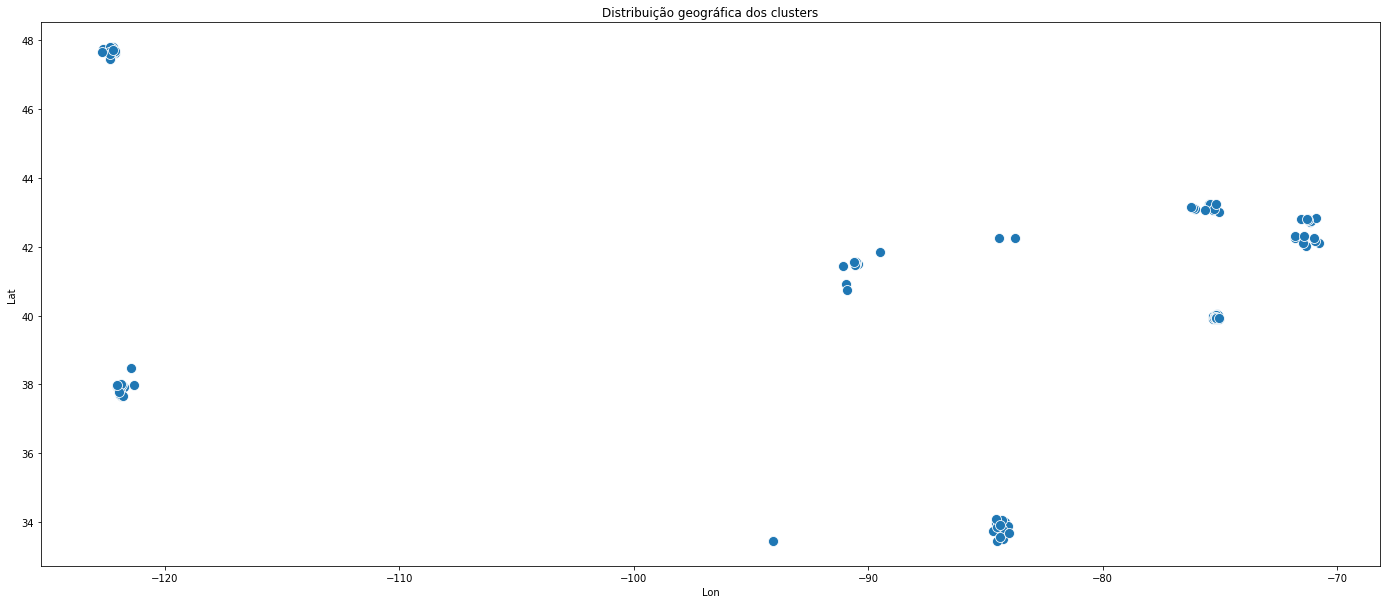

In [204]:
plt.figure(figsize=(24, 10))
geo = sns.scatterplot(data=df_labs, x="Lon", y="Lat", s=100)
geo.set(title="Distribuição geográfica dos clusters")

* Pontos mais concentrados indicam laboratórios com grande grau de competitividade, possuem uma maior quantidade de clientes e um valor mais caro para os exames;
* Pontos menos concentrados indicam laboratórios com pequeno grau de competitividade, possuem uma menor quantidade de clientes e um valor mais barato para os exames.

## Faturamento por Laboratório

<function matplotlib.pyplot.show(close=None, block=None)>

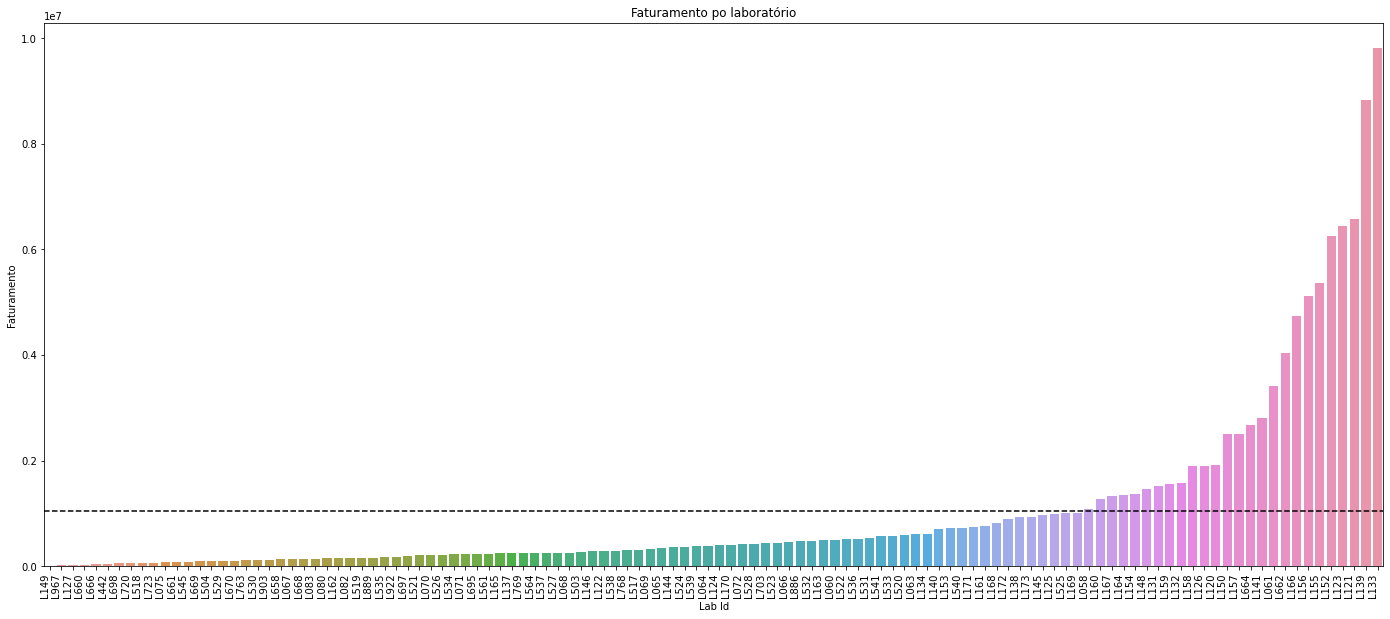

In [205]:
media_faturamento = df_labs["Faturamento"].mean()
plt.figure(figsize=(24, 10))
geo = sns.barplot(data=df_labs.sort_values(by="Faturamento"), x="Lab Id", y="Faturamento")
plt.axhline(media_faturamento, 0, 1, color="black", **{"ls": "--"})
geo.set(title="Faturamento po laboratório")
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show

Seria interessante escolher apenas os laboratórios acima da média de faturamento, porém outros aspectos têm que ser levados em consideração e essa medida pode ser um pouco enganosa de certa forma. Pode ser que estejam com um faturamento altíssimo, mas podem estar trabalhando com uma margem pequena para conseguir competir no mercado ou estarem operando no prejuízo.

## Distribuição geográfica do faturamento

<AxesSubplot:xlabel='Lon', ylabel='Lat'>

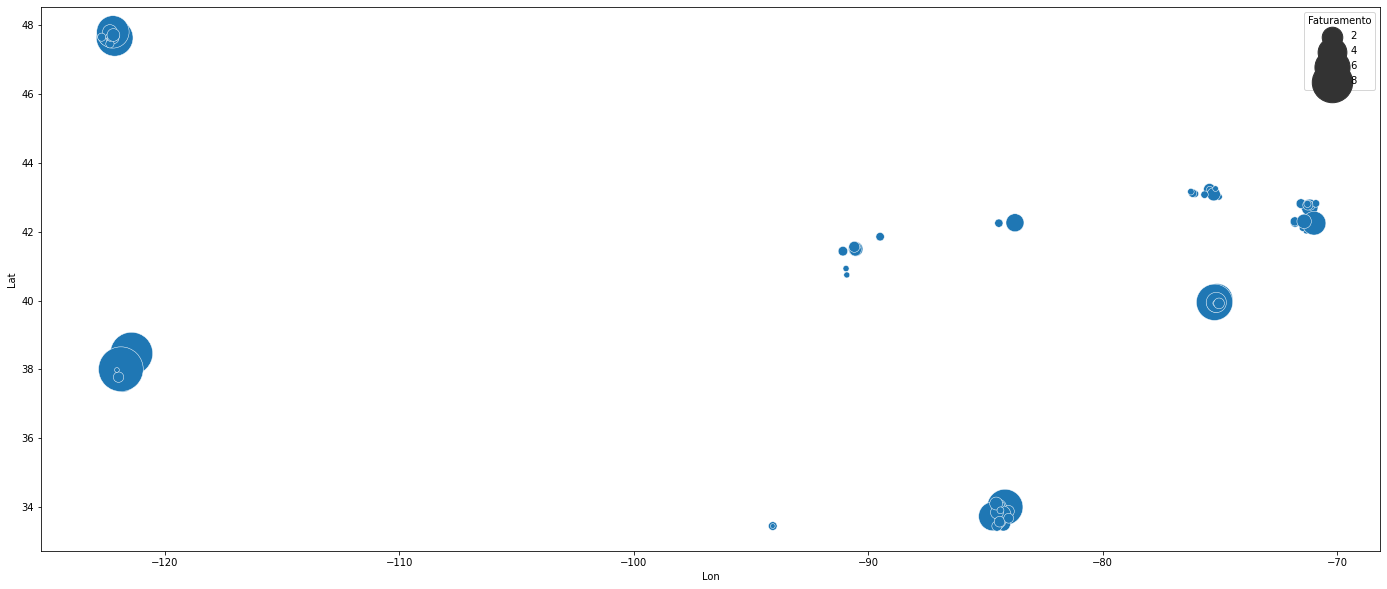

In [206]:
plt.figure(figsize=(24,10))
sns.scatterplot(data=df_labs, x="Lon", y="Lat", size="Faturamento", sizes=(20, 2000))

Esse gráfico ajuda a entender um pouco melhor como a posição geográfica afeta no faturamento dos laboratórios. Sendo bastante interessante trabalhar com laboratórios mais isolados, porém com uma quantidade significativa de faturamento. Além disso, pode se notar que alguns laboratórios se sobressasaem mesmo com uma alta quantidade de laboratórios, o que indica um domínio desses laboratórios nessas regiões.

## Distribuição geográfica do ticket médio

<AxesSubplot:xlabel='Lon', ylabel='Lat'>

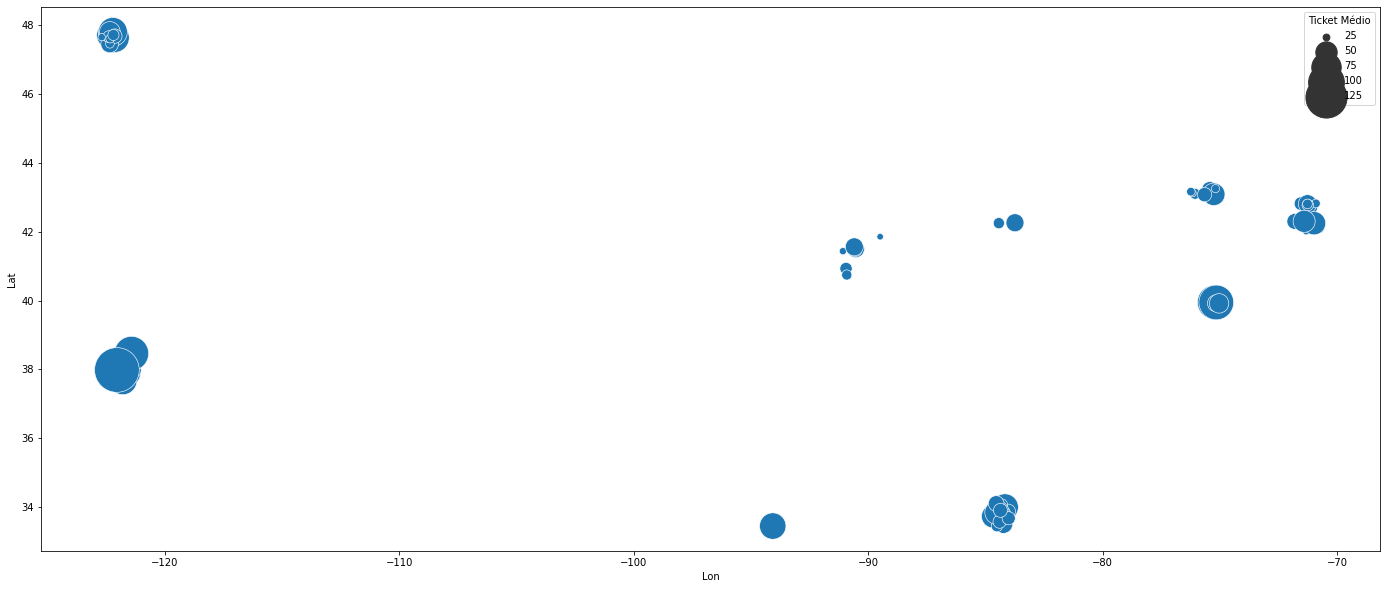

In [207]:
plt.figure(figsize=(24,10))
sns.scatterplot(data=df_labs, x="Lon", y="Lat", size="Ticket Médio", sizes=(20, 2000))

## Distribuição geográfica do número de exames

In [208]:
plt.figure(figsize=(24,10))
sns.scatterplot(data=df_labs, x="Lon", y="Lat", size="Número de Exames", sizes=(20, 2000))

ValueError: Could not interpret value `Número de Exames` for parameter `size`

<Figure size 1728x720 with 0 Axes>

## Ticket Médio x Número de Exames

In [ ]:
media_numero_exames = df_labs["Número de Exames"].mean()
media_ticket_medio = df_labs["Ticket Médio"].mean()
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x="Número de Exames", y="Ticket Médio", s=100)
plt.axhline(media_ticket_medio, 0, 1, color="black", **{"ls": "--"})
plt.axvline(media_numero_exames, 0, 1, color="black", **{"ls": "--"})

NameError: name 'df' is not defined

<Figure size 720x720 with 0 Axes>

O gráfico é dividido em quatro áreas com características distintas:
* Superior direito: Possuem um alto ticket médio e um alto número de exames (Ótimo);
* Superior esquerdo: Possuem um alto ticket médio e um baixo número de exames (Bom);
* Inferior direito: Possuem um baixo ticket médio e um alto número de exames (Bom);
* Inferior esquerdo: Possuem um baixo ticket médio e um baixo número de exames (Ruim).

## Número de Exames para Mulheres e Homens

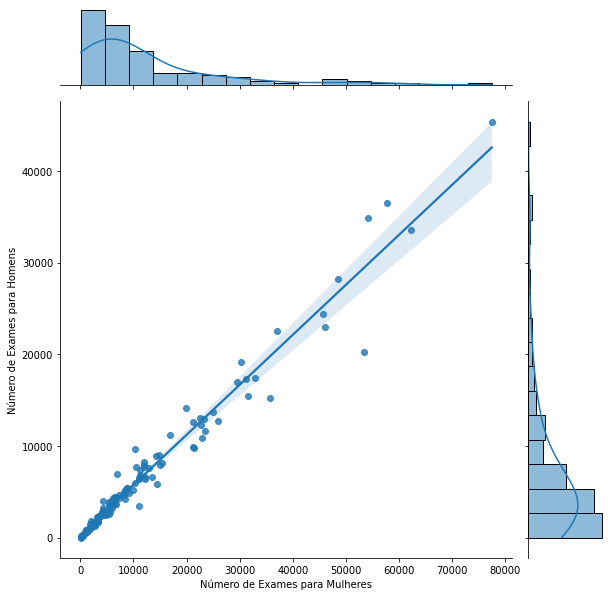

In [ ]:
sns.jointplot(data=df_labs, x="Número de Exames para Mulheres", y="Número de Exames para Homens", kind="reg", height=8.4)

* Identificação de um padrão de comportamento da proporção de exames para mulheres e para homens
* Existindo uma tendência para uma maior quantidade de mulheres realizando os exames do que homens